In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.1 MB/s eta 0:00:00


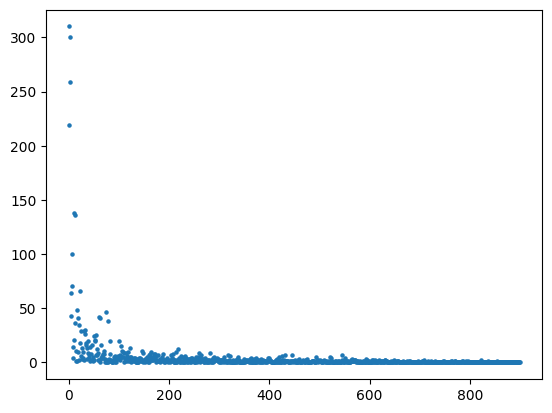

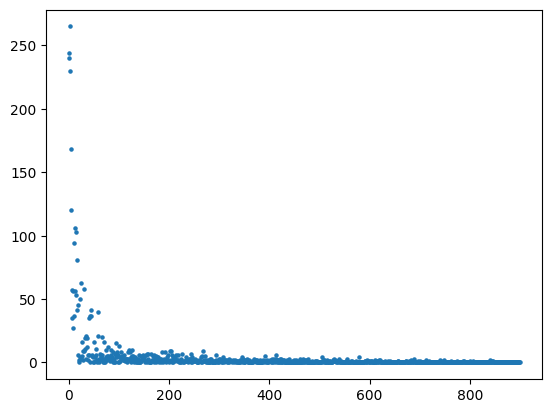

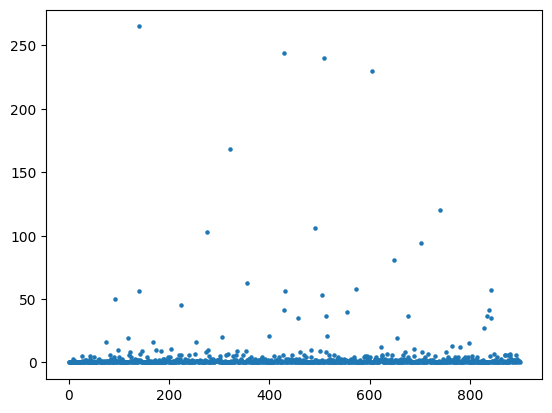

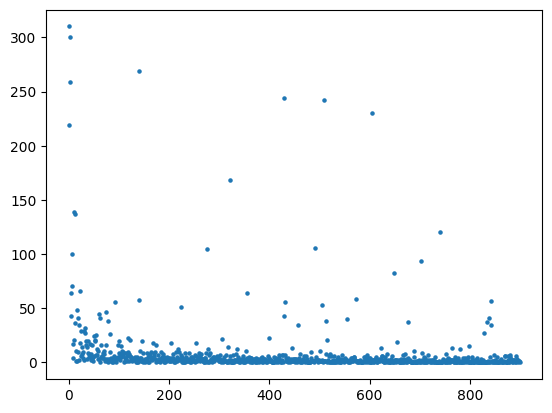

In [ ]:
import igraph
import numpy as np
import matplotlib.pyplot as plt

m = 4
n = 900

# Create the first graph
g1 = igraph.Graph.Barabasi(n, m, directed=True)
degrees1 = g1.indegree()

# Create the second graph
g2 = igraph.Graph.Barabasi(n, m, directed=True)
degrees2 = g2.indegree()

# Shuffle
g2 = g2.permute_vertices(list(np.random.permutation(n)))
degrees3 = g2.indegree()

# Merge the two graphs
# g1.add_vertices(n)
g1.add_edges(g2.get_edgelist())

# g1 = g1 + g2
# g1.vs["id"] = list(range(2*n))


degrees4 = g1.indegree()


plt.scatter(range(900),degrees1, s=5)
plt.show()
plt.scatter(range(900),degrees2, s=5)
plt.show()
plt.scatter(range(900),degrees3, s=5)
plt.show()
plt.scatter(range(900),degrees4, s=5)
plt.show()

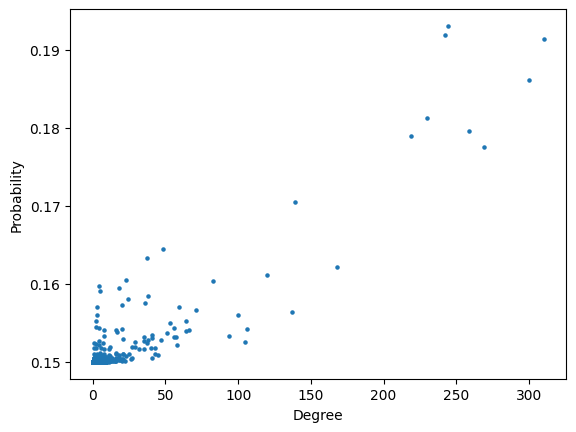

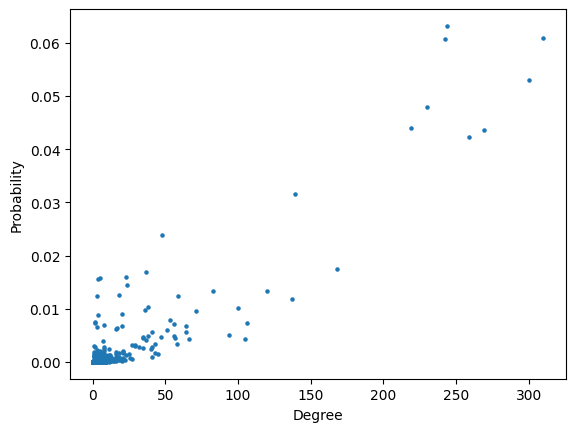

In [ ]:
# Calculate the probability for each node
probs = []
degrees = []

for node in range(n):
    pr = g1.personalized_pagerank(directed=True, reset_vertices=node)
    probs.append(pr[node])
    degrees.append(g1.indegree()[node])

# Check if the probability is related to the degree of the nodes
plt.scatter(degrees, probs, s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()



# # Initialize the probability vector
# p = np.zeros(n)
# p[0] = 1  # start at the first node

# # Perform a random walk for 1000 steps
# steps = 1000
# for i in range(steps):
#     # Choose a random outgoing edge from the current node
#     print(p)
#     current_node = np.random.choice(range(n), p=p)
#     neighbors = g1.successors(current_node)
#     if len(neighbors) == 0:
#         # If the current node has no outgoing edges, restart the random walk from a different node
#         p = np.zeros(n)
#         new_start = np.random.choice(range(n))
#         p[new_start] = 1
#     else:
#         # Choose a neighbor node uniformly at random
#         next_node = np.random.choice(neighbors)
#         # Update the probability vector
#         p[next_node] += 1 / len(neighbors)

# # Normalize the probability vector
# p = p / np.sum(p)

# # Get the in-degree of each node in the original graph
# degrees = g1.indegree()[:n]

# plt.scatter(degrees, p, s=5)
# plt.xlabel('Degree')
# plt.ylabel('Probability')
# plt.show()


iters = 100
size = 900
p = np.zeros(size)
degrees = np.zeros(size)

for iter in range(iters):
  # Initialize a counter array to keep track of the number of times each node is visited
  visit_count = np.zeros(size)

  # Perform a random walk for 1000 steps
  steps = 1000
  current_node = np.random.choice(range(size))
  for i in range(steps):
      # Increment the counter for the current node
      visit_count[current_node] += 1
      # Choose a random outgoing edge from the current node
      neighbors = g1.successors(current_node)
      if len(neighbors) == 0:
          # If the current node has no outgoing edges, restart the random walk from a different node
          current_node = np.random.choice(range(size))
      else:
          # Choose a neighbor node uniformly at random
          next_node = np.random.choice(neighbors)
          current_node = next_node

  # Normalize the visit count array to obtain the probability of visiting each node
  p += (visit_count / np.sum(visit_count))

# Get the in-degree of each node in the original graph
degrees = g1.indegree()

p /= iters

plt.scatter(degrees, p, s=5)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.show()


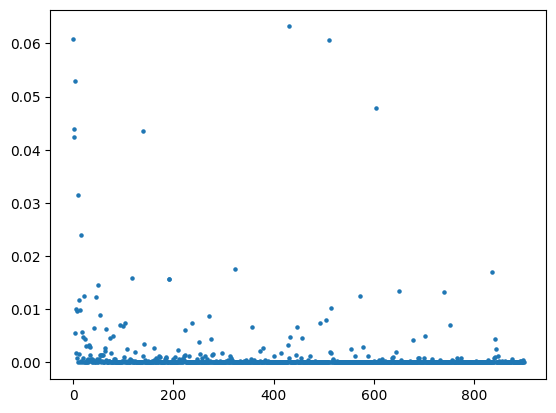

In [ ]:

plt.scatter(range(len(p)),p, s=5)
plt.show()